# ****
# Data Pre-processing & K-Means Clustering Program Sectors.
# ****

In [1132]:
# Import relevant Python packages for program-specific purposes with ML --> K-Means Clustering sections.
# Pandas is the primary package of choice throughout this program for preprocessing and handling all datasets.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# Setup the interactive notebook mode.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [1133]:
# Downloading of relevant CSV file/files for data processing and program implementation.
#sen_data = pd.read_csv("weekendOutputWithPolarity.csv")
#sen_data = pd.read_csv("chiliPepperOutputWithPolarity.csv")
sen_data = pd.read_csv("all_music_data.csv")

In [1134]:
# Print out first five lines of the specified Pandas DataFrame. 
sen_data.head()

# Print length of sen_data Pandas DataFrame.
len(sen_data)

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1650170544917217281,Mordecai5280,NaN,Red Hot Chili Peppers,2023-04-23 16:11:31+00:00,neutral,0.00
1,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",Red Hot Chili Peppers,2023-04-23 16:08:36+00:00,positive,0.12
2,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,Red Hot Chili Peppers,2023-04-23 16:08:32+00:00,positive,0.12
3,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,Red Hot Chili Peppers,2023-04-23 16:07:13+00:00,positive,0.12
4,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,Red Hot Chili Peppers,2023-04-23 16:03:18+00:00,positive,0.25


11438

In [1135]:
# Check for NaN values within each column of the DataFrame.
sen_data.isna().sum()

tweet_id      0
Username      0
text          8
Artist        0
created_at    0
sentiment     0
polarity      0
dtype: int64

In [1136]:
# Drop all NaN values from each specific column of the entire DataFrame.
sen_data.dropna(inplace=True)

In [1137]:
# Reset indexes of the DataFrame after removal of all NaN values contained within the DataFrame.
sen_data.reset_index().head()

,index,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",Red Hot Chili Peppers,2023-04-23 16:08:36+00:00,positive,0.12
1,2,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,Red Hot Chili Peppers,2023-04-23 16:08:32+00:00,positive,0.12
2,3,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,Red Hot Chili Peppers,2023-04-23 16:07:13+00:00,positive,0.12
3,4,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,Red Hot Chili Peppers,2023-04-23 16:03:18+00:00,positive,0.25
4,5,1650164168300048384,MadBulldogBKK,Last week of at - Acoustic Rock (25th)- Old Sc...,Red Hot Chili Peppers,2023-04-23 15:46:10+00:00,positive,0.05


In [1138]:
# Set Kval to six --> Kval specifies the number of clusters to be produced when executing the 
# K-Means clustering algorithm.
Kval = 6

# Print out each columns datatype within the DataFrame.
sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist         object
created_at     object
sentiment      object
polarity      float64
dtype: object

In [1139]:
# Mapping and Encoding data values within the sen_data Pandas DataFrame.
artist_map = {'The Weeknd' : 0, 'Red Hot Chili Peppers' : 1, 'Soulja Boy' : 2, 'Miley Cyrus' : 3} # Mapping per artist.
sen_data = sen_data.applymap(lambda x : artist_map.get(x) if x in artist_map else x) # Application per artist.

sentiment_map = {'positive' : 0, 'neutral' : 1, 'negative' : 2} # Mapping per sentiment type.
sen_data = sen_data.applymap(lambda x : sentiment_map.get(x) if x in sentiment_map else x) # Application per sentiment type.

# Printing out the first five lines of the data-encoded DataFrame.
sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
1,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",1,2023-04-23 16:08:36+00:00,0,0.12
2,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,1,2023-04-23 16:08:32+00:00,0,0.12
3,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,1,2023-04-23 16:07:13+00:00,0,0.12
4,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,1,2023-04-23 16:03:18+00:00,0,0.25
5,1650164168300048384,MadBulldogBKK,Last week of at - Acoustic Rock (25th)- Old Sc...,1,2023-04-23 15:46:10+00:00,0,0.05


In [1140]:
# Altering the datetime column of created_at to %YYYY formatting.
sen_data['created_at'] = pd.to_datetime(sen_data['created_at']).dt.strftime('%Y')

# Printing out the first five lines of the DataFrame.
sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
1,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",1,2023,0,0.12
2,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,1,2023,0,0.12
3,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,1,2023,0,0.12
4,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,1,2023,0,0.25
5,1650164168300048384,MadBulldogBKK,Last week of at - Acoustic Rock (25th)- Old Sc...,1,2023,0,0.05


In [1141]:
# For good measure, check the datatypes of each column within this DataFrame.
sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist          int64
created_at     object
sentiment       int64
polarity      float64
dtype: object

In [1142]:
# Change the datatype of the 'created_at' column from 'object' datatype --> 'int' datatype.
sen_data['created_at'] = sen_data['created_at'].astype(int)

In [1143]:
# Print datatype of columns in DataFrame to ensure that 'created_at' is changed from 'object' to 'int' datatype.
sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist          int64
created_at      int64
sentiment       int64
polarity      float64
dtype: object

In [1144]:
# Import viz libraries for data visualization of clustered data values through Scatter plots.  
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [1145]:
# Compute correlations between values within the DataFrame.
correl = sen_data.corr()

# Compute and print a heatmap of all correlations between data values within the DataFrame.
trace = go.Heatmap(z=correl.values,
                   x=correl.index.values,
                   y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [1146]:
# Print out all columns and first five lines of the DataFrame.
sen_data.columns

sen_data.head()

Index(['tweet_id', 'Username', 'text', 'Artist', 'created_at', 'sentiment',
       'polarity'],
      dtype='object')

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
1,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",1,2023,0,0.12
2,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,1,2023,0,0.12
3,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,1,2023,0,0.12
4,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,1,2023,0,0.25
5,1650164168300048384,MadBulldogBKK,Last week of at - Acoustic Rock (25th)- Old Sc...,1,2023,0,0.05


In [1147]:
# Split data columns of the DataFrame into text columns and numerical-valued columns for clustering purposes.
cols1 = ['tweet_id', 'Username', 'created_at']
cols2 = ['polarity', 'sentiment', 'Artist']

# Standardize the numerically-valued data columns and create a DataFrame with these normalized numerical columns. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

subset_data = pd.DataFrame(sc.fit_transform(sen_data[cols2]), columns = sen_data[cols2].columns, index = sen_data.index)

# Print first five lines of the new DataFrame containing normalized numerical values. 
subset_data.head()


,polarity,sentiment,Artist
1,0.13,-1.00,-0.54
2,0.13,-1.00,-0.54
3,0.13,-1.00,-0.54
4,0.63,-1.00,-0.54
5,-0.17,-1.00,-0.54


# K-Means Clustering.

In [1148]:
# Execute the K-Means clustering algorithm upon the new DataFrame.
# Algorithm produces 6 clusters and a new DataFrame containing which cluster each data value is contained within.
from sklearn.cluster import KMeans

km = KMeans(n_clusters = Kval,
            init = 'k-means++',
            n_init = 10,
            max_iter = 500,
            random_state = 50)
data_km = pd.DataFrame(km.fit_predict(subset_data), index = subset_data.index)

data_km.head()

,0
1,3
2,3
3,3
4,3
5,3


In [1149]:
# Merge the cluster column of the above DataFrame onto the original DataFrame.
data_km.rename(columns = {0:'cluster'}, inplace = True)

# Merge DataFrame produced after K-Means clustering onto the original DataFrame.
data_km = data_km.merge(sen_data, left_index = True, right_index = True)

data_km.head()

,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
1,3,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",1,2023,0,0.12
2,3,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,1,2023,0,0.12
3,3,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,1,2023,0,0.12
4,3,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,1,2023,0,0.25
5,3,1650164168300048384,MadBulldogBKK,Last week of at - Acoustic Rock (25th)- Old Sc...,1,2023,0,0.05


In [1150]:
# Plot the clusters onto a graph through a Scatter Plot that displays specific cluster data points.
plot_data = []

for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))
    
# Add the following for cluster centroids.
# df_cc = pd.DataFrame(km.cluster_centers_)
# plot_data.append(go.Scatter(x=df_cc[1], y=df_cc[0],
#                           # text=df['name'],
#                             name='cluster center', mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

KMeans(max_iter=500, n_clusters=13, random_state=50)

KMeans(max_iter=500, n_clusters=14, random_state=50)

KMeans(max_iter=500, n_clusters=15, random_state=50)

KMeans(max_iter=500, n_clusters=16, random_state=50)

KMeans(max_iter=500, n_clusters=17, random_state=50)

KMeans(max_iter=500, n_clusters=18, random_state=50)

KMeans(max_iter=500, n_clusters=19, random_state=50)

KMeans(max_iter=500, n_clusters=20, random_state=50)

KMeans(max_iter=500, n_clusters=21, random_state=50)

KMeans(max_iter=500, n_clusters=22, random_state=50)

KMeans(max_iter=500, n_clusters=23, random_state=50)

KMeans(max_iter=500, n_clusters=24, random_state=50)

KMeans(max_iter=500, n_clusters=25, random_state=50)

KMeans(max_iter=500, n_clusters=26, random_state=50)

KMeans(max_iter=500, n_clusters=27, random_state=50)

KMeans(max_iter=500, n_clusters=28, random_state=50)

KMeans(max_iter=500, n_clusters=29, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

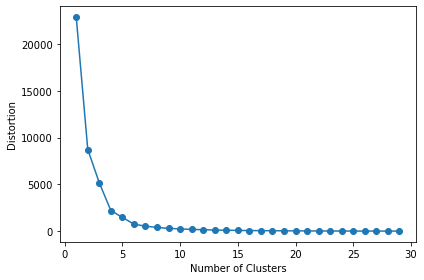

In [1151]:
# Plot K-Means clustering distortions.
# This plot displays the iterations required to minimize the euclidean distance of points within a cluster to
# the centroid of that specific cluster. 
distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(subset_data[['sentiment', 'polarity']]) # Fitting solely 'polarity' and 'sentiment' data columns.
    distortions.append(km.inertia_)
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

KMeans(max_iter=500, n_clusters=13, random_state=50)

KMeans(max_iter=500, n_clusters=14, random_state=50)

KMeans(max_iter=500, n_clusters=15, random_state=50)

KMeans(max_iter=500, n_clusters=16, random_state=50)

KMeans(max_iter=500, n_clusters=17, random_state=50)

KMeans(max_iter=500, n_clusters=18, random_state=50)

KMeans(max_iter=500, n_clusters=19, random_state=50)

KMeans(max_iter=500, n_clusters=20, random_state=50)

KMeans(max_iter=500, n_clusters=21, random_state=50)

KMeans(max_iter=500, n_clusters=22, random_state=50)

KMeans(max_iter=500, n_clusters=23, random_state=50)

KMeans(max_iter=500, n_clusters=24, random_state=50)

KMeans(max_iter=500, n_clusters=25, random_state=50)

KMeans(max_iter=500, n_clusters=26, random_state=50)

KMeans(max_iter=500, n_clusters=27, random_state=50)

KMeans(max_iter=500, n_clusters=28, random_state=50)

KMeans(max_iter=500, n_clusters=29, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

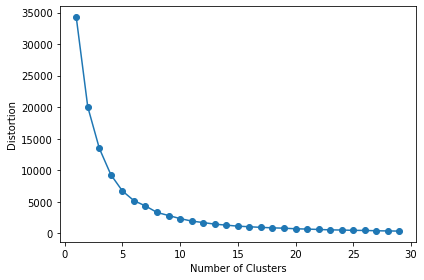

In [1152]:
# Plot K-Means clustering distortions.
# This plot displays the iterations required to minimize the euclidean distance of points within a cluster to
# the centroid of that specific cluster.
# Difference between this plot and above plot is that this plot computes distortions for all columns
# of the DataFrame, not solely for 'polarity' and for 'sentiment'. Thus a generalized distortions plot.
distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(subset_data) # Fitting all data columns of the 'subset_data' DataFrame.
    distortions.append(km.inertia_)
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# Agglomerative Clustering.

In [1153]:
# Implementation and execution of the Agglomerative Clustering algorithm. 
# Primarily implemented for comparison with the K-Means clustering algorithm.
# The algorithm produces 0 clusters and employs euclidean distance as a measure of cluster affinity.
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=None,
                             distance_threshold=1.0,
                             affinity='euclidean',
                             linkage='complete')

# Create and display a new DataFrame containing which cluster each specific data point is contained within.
data_ac = pd.DataFrame(ac.fit_predict(subset_data), index=subset_data.index)
data_ac.head()

# Merge the 'cluster' column of the 'data_ac' DataFrame onto the original DataFrame and diaplay the DataFrame.
data_ac.rename(columns={0 : 'cluster'}, inplace=True)
data_ac = data_ac.merge(sen_data, left_index=True, right_index=True)
data_ac.head()

,0
1,13
2,13
3,13
4,0
5,13


,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
1,13,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",1,2023,0,0.12
2,13,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,1,2023,0,0.12
3,13,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,1,2023,0,0.12
4,0,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,1,2023,0,0.25
5,13,1650164168300048384,MadBulldogBKK,Last week of at - Acoustic Rock (25th)- Old Sc...,1,2023,0,0.05


In [1154]:
# Plot the clusters onto a graph through a Scatter Plot that displays specific cluster data points.
plot_data = []
for clus in set(data_ac['cluster']):
    df = data_ac[data_ac['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

# K-Means Clustering --> Positive Polarity - Sentiment Analysis.

In [1155]:
# Filter the original DataFrame to contain solely polarity values that are greater than 0.
# Thus, filtering the DataFrame for tweets and users that share positive sentiment about the artist.
pos_sen_data = sen_data[sen_data['polarity'] > 0.0]
pos_sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
1,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",1,2023,0,0.12
2,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,1,2023,0,0.12
3,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,1,2023,0,0.12
4,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,1,2023,0,0.25
5,1650164168300048384,MadBulldogBKK,Last week of at - Acoustic Rock (25th)- Old Sc...,1,2023,0,0.05


In [1156]:
# Standardize the numerically-valued data columns and create a DataFrame with these normalized numerical columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

pos_pol = pd.DataFrame(sc.fit_transform(pos_sen_data[cols2]), columns=pos_sen_data[cols2].columns, index=pos_sen_data.index)

# Print the first five lines of the newly created DataFrame and the length of this DataFrame.
pos_pol.head()

len(pos_pol)

,polarity,sentiment,Artist
1,-0.67,0.00,-0.48
2,-0.67,0.00,-0.48
3,-0.67,0.00,-0.48
4,-0.12,0.00,-0.48
5,-1.00,0.00,-0.48


5062

In [1157]:
# Execute the K-Means clustering algorithm upon the new DataFrame.
# Algorithm produces 6 clusters and a new DataFrame containing which cluster each data value is contained within.
from sklearn.cluster import KMeans

km_pos = KMeans(n_clusters = 6,
            init='k-means++',
            n_init=10,
            max_iter=500,
            random_state=50)
data_km = pd.DataFrame(km_pos.fit_predict(pos_pol[cols2]), index=pos_pol[cols2].index)

In [1158]:
# Merge the cluster column of the above DataFrame onto the original DataFrame.
data_km.rename(columns={0 : 'cluster'}, inplace=True)

# Merge DataFrame produced after K-Means clustering onto the original DataFrame.
data_km = data_km.merge(sen_data, left_index=True, right_index=True)

data_km.head()

,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
1,0,1650169813602377728,fluxfm_berlin,". :08 Uhr: Red Hot Chili Peppers ""Californicat...",1,2023,0,0.12
2,0,1650169794665099266,_Hits_music_,Give It Away - Red Hot Chili Peppers,1,2023,0,0.12
3,0,1650169465386987523,AIChains5150,Red Hot Chili Peppers - I Could Have Lied,1,2023,0,0.12
4,0,1650168476575711232,barryggr,Tango Till They're Sore - Tom WaitsThat's the ...,1,2023,0,0.25
5,0,1650164168300048384,MadBulldogBKK,Last week of at - Acoustic Rock (25th)- Old Sc...,1,2023,0,0.05


In [1159]:
# Plot the clusters onto a graph through a Scatter Plot that displays specific cluster data points.
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))
    
# Added the succeeding source-code for cluster centers.
# df_cc = pd.DataFrame(km_pos.cluster_centers_)
# plot_data.append(go.Scatter(x=df_cc[1], y=df_cc[0],
#                             text=df['name'],
#                             name='cluster center', mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

KMeans(max_iter=500, n_clusters=13, random_state=50)

KMeans(max_iter=500, n_clusters=14, random_state=50)

KMeans(max_iter=500, n_clusters=15, random_state=50)

KMeans(max_iter=500, n_clusters=16, random_state=50)

KMeans(max_iter=500, n_clusters=17, random_state=50)

KMeans(max_iter=500, n_clusters=18, random_state=50)

KMeans(max_iter=500, n_clusters=19, random_state=50)

KMeans(max_iter=500, n_clusters=20, random_state=50)

KMeans(max_iter=500, n_clusters=21, random_state=50)

KMeans(max_iter=500, n_clusters=22, random_state=50)

KMeans(max_iter=500, n_clusters=23, random_state=50)

KMeans(max_iter=500, n_clusters=24, random_state=50)

KMeans(max_iter=500, n_clusters=25, random_state=50)

KMeans(max_iter=500, n_clusters=26, random_state=50)

KMeans(max_iter=500, n_clusters=27, random_state=50)

KMeans(max_iter=500, n_clusters=28, random_state=50)

KMeans(max_iter=500, n_clusters=29, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

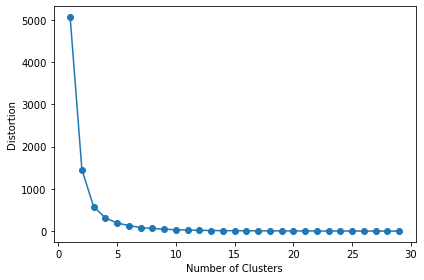

In [1160]:
# Plot K-Means clustering distortions.
# This plot displays the iterations required to minimize the euclidean distance of points within a cluster to
# the centroid of that specific cluster.
distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(pos_pol[['sentiment', 'polarity']]) # Fitting solely 'polarity' and 'sentiment' data columns.
    distortions.append(km.inertia_)
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

KMeans(max_iter=500, n_clusters=13, random_state=50)

KMeans(max_iter=500, n_clusters=14, random_state=50)

KMeans(max_iter=500, n_clusters=15, random_state=50)

KMeans(max_iter=500, n_clusters=16, random_state=50)

KMeans(max_iter=500, n_clusters=17, random_state=50)

KMeans(max_iter=500, n_clusters=18, random_state=50)

KMeans(max_iter=500, n_clusters=19, random_state=50)

KMeans(max_iter=500, n_clusters=20, random_state=50)

KMeans(max_iter=500, n_clusters=21, random_state=50)

KMeans(max_iter=500, n_clusters=22, random_state=50)

KMeans(max_iter=500, n_clusters=23, random_state=50)

KMeans(max_iter=500, n_clusters=24, random_state=50)

KMeans(max_iter=500, n_clusters=25, random_state=50)

KMeans(max_iter=500, n_clusters=26, random_state=50)

KMeans(max_iter=500, n_clusters=27, random_state=50)

KMeans(max_iter=500, n_clusters=28, random_state=50)

KMeans(max_iter=500, n_clusters=29, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

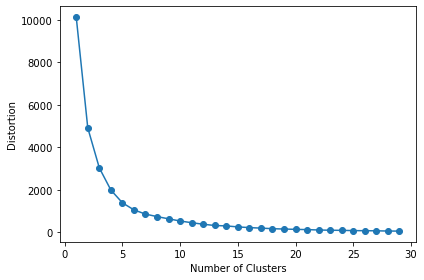

In [1161]:
# Plot K-Means clustering distortions.
# This plot displays the iterations required to minimize the euclidean distance of points within a cluster to
# the centroid of that specific cluster.
# Difference between this plot and above plot is that this plot computes distortions for all columns
# of the DataFrame, not solely for 'polarity' and for 'sentiment'. Thus a generalized distortions plot.
distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(pos_pol) # Fitting all data columns of the 'pos_pol' DataFrame.
    distortions.append(km.inertia_)
plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# ****
# Neural Network Creation Sector Of Program.
# ****

In [1162]:
# Import relevant Python packages for building and utilizing of Feed Forward Neural Networks (FFNN) in Python.
# The Python packages of Keras and of TensorFlow are the packages of choice for FFNN creation and utilization.
import tensorflow as tf
import keras
import tensorflow.keras
from tensorflow.keras import layers
from keras import optimizers
import random
from random import randrange
from math import exp
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

# Import relevant packages for the assessment of FFNN optimization.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score

In [1163]:
# Create a new Pandas DataFrame with solely numerical data columns from the original DataFrame
# containing both text columns and numerical columns.
nn_df = sen_data.drop(columns=['tweet_id', 'Username', 'text', 'created_at'])

nn_df.head()

,Artist,sentiment,polarity
1,1,0,0.12
2,1,0,0.12
3,1,0,0.12
4,1,0,0.25
5,1,0,0.05


In [1164]:
# Encode the data values of the 'polarity' data column to be:
    # -1: Negative sentiment about the artist.
    # 0: Neutral sentiment about the artist.
    # +1: Positive sentiment about the artist.
nn_df.loc[nn_df['polarity'] < 0.0] = -1

nn_df.loc[nn_df['polarity'] == 0.0] = 0

nn_df.loc[nn_df['polarity'] > 0.0] = 1

nn_df.head()

,Artist,sentiment,polarity
1,1,1,1.00
2,1,1,1.00
3,1,1,1.00
4,1,1,1.00
5,1,1,1.00


In [1165]:
# Split the newly created Pandas DataFrame into corresponding training and testing datasets for ML purposes.
X_train, X_test, y_train, y_test = train_test_split(nn_df.drop(columns=['polarity']), nn_df['polarity'], test_size=0.30, random_state=13)

X_train
X_test
y_train
y_test


,Artist,sentiment
3781,-1,-1
8624,0,0
8642,-1,-1
4109,-1,-1
3820,0,0
...,...,...
869,1,1
10990,0,0
7702,0,0
75,1,1


,Artist,sentiment
10396,1,1
10797,-1,-1
1437,1,1
9756,0,0
2548,0,0
...,...,...
4293,0,0
8092,-1,-1
10773,0,0
2122,1,1


3781    -1.00
8624     0.00
8642    -1.00
4109    -1.00
3820     0.00
         ... 
869      1.00
10990    0.00
7702     0.00
75       1.00
339      1.00
Name: polarity, Length: 8001, dtype: float64

10396    1.00
10797   -1.00
1437     1.00
9756     0.00
2548     0.00
         ... 
4293     0.00
8092    -1.00
10773    0.00
2122     1.00
8145     0.00
Name: polarity, Length: 3429, dtype: float64

In [1166]:
# Create a Keras Sequential FFNN neural network model with architecture of:
    # Input nodes: 2.
    # Hidden layer nodes: 10.
    # Output nodes: 1.
sa_model = Sequential()

sa_model.add(keras.Input(shape=(2,)))
sa_model.add(Dense(10, activation='sigmoid'))
sa_model.add(Dense(1))

In [1167]:
# Compile the Sequential model with Adam() optimizer, categorical_crossentropy loss, and accuracy metric.
sa_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [1168]:
# Implement two Sequential model callbacks for overall model optimization of node weights.
callback00 = ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)

callback01 = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)


In [1169]:
# Fit the Sequential model onto the training data and check with testing data.
# The Sequential model updates and optimizes node weight values through an embedded Backpropagation algorithm.
sa_model_history = sa_model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[callback00, callback01], validation_data=(X_test, y_test))

Epoch 1/100
251/251 [==============================] - 1s 2ms/step - loss: 5.1609 - accuracy: 0.4504 - val_loss: 5.2361 - val_accuracy: 0.4500
Epoch 2/100
251/251 [==============================] - 0s 1ms/step - loss: 5.1609 - accuracy: 0.4504 - val_loss: 5.2361 - val_accuracy: 0.4500
Epoch 3/100
251/251 [==============================] - 0s 1ms/step - loss: 5.1609 - accuracy: 0.4504 - val_loss: 5.2361 - val_accuracy: 0.4500
Epoch 4/100
251/251 [==============================] - 0s 1ms/step - loss: 5.1609 - accuracy: 0.4504 - val_loss: 5.2361 - val_accuracy: 0.4500
Epoch 5/100
251/251 [==============================] - 0s 1ms/step - loss: 5.1609 - accuracy: 0.4504 - val_loss: 5.2361 - val_accuracy: 0.4500
Epoch 6/100
251/251 [==============================] - 0s 1ms/step - loss: 5.1609 - accuracy: 0.4504 - val_loss: 5.2361 - val_accuracy: 0.4500
Epoch 7/100
251/251 [==============================] - 0s 1ms/step - loss: 5.1609 - accuracy: 0.4504 - val_loss: 5.2361 - val_accuracy: 0.4500

Text(0.5, 1.0, 'Backpropagated FFNN Accuracy per Epoch')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

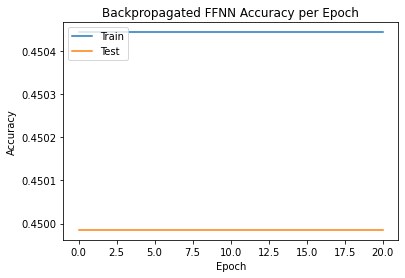

In [1170]:
# Plot train data vs. test data accuracy scores per epoch of Backpropagated FFNN model.

plt.plot(sa_model_history.history['accuracy'])
plt.plot(sa_model_history.history['val_accuracy'])
plt.title('Backpropagated FFNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [1171]:
# Predict X_train values and X_test values for usage in confusion matrices and classification reports.
sa_pred_x = sa_model.predict(X_train).round()
sa_pred_y = sa_model.predict(X_test).round()

108/108 [==============================] - 0s 720us/step


In [1172]:
# Create a confusion matrix and subsequent classification report on the training dataset.
sa_train_cm = confusion_matrix(y_train, sa_pred_x)
sa_train_cr = classification_report(y_train, sa_pred_x)

# Print confusion matrix and classification report.
print(sa_train_cm)
print(sa_train_cr)

[[ 860    0    0]
 [3604    0    0]
 [   0 3537    0]]
              precision    recall  f1-score   support

        -1.0       0.19      1.00      0.32       860
         0.0       0.00      0.00      0.00      3604
         1.0       0.00      0.00      0.00      3537

    accuracy                           0.11      8001
   macro avg       0.06      0.33      0.11      8001
weighted avg       0.02      0.11      0.03      8001



In [1173]:
# Create confusion matrix and subsequent classification report on the testing dataset.
sa_test_cm = confusion_matrix(y_test, sa_pred_y)
sa_test_cr = classification_report(y_test, sa_pred_y)

# Print confusion matrix and classification report.
print(sa_test_cm)
print(sa_test_cr)

[[ 361    0    0]
 [1543    0    0]
 [   0 1525    0]]
              precision    recall  f1-score   support

        -1.0       0.19      1.00      0.32       361
         0.0       0.00      0.00      0.00      1543
         1.0       0.00      0.00      0.00      1525

    accuracy                           0.11      3429
   macro avg       0.06      0.33      0.11      3429
weighted avg       0.02      0.11      0.03      3429



In [1174]:
# Import seaborn package for visualizing confusion matrices.
import seaborn as sns

<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'FFNN Train Data Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

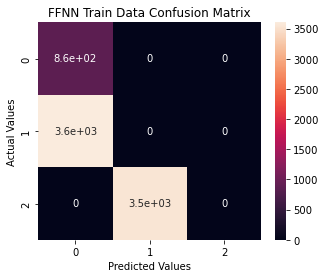

In [1175]:
# FFNN Train Dataset Confusion Matrix.
plt.figure(figsize=(5,4))
sns.heatmap(sa_train_cm, annot=True)
plt.title('FFNN Train Data Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'FFNN Test Data Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

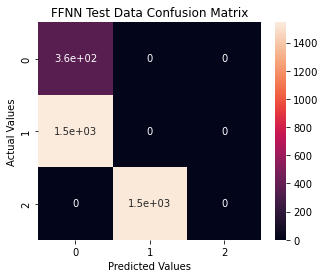

In [1176]:
# FFNN Test Dataset Confusion Matrix.
plt.figure(figsize=(5,4))
sns.heatmap(sa_test_cm, annot=True)
plt.title('FFNN Test Data Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# MLP Classifier Backpropagated FFNN.

In [1177]:
# Import relevant packages for implementing an MLPClassifier FFNN with Backpropagation.
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import warnings 

In [1178]:
# Suppress all warning messages for clarity when inspecting and analyzing program outputs.
# Reduces clutter.
warnings.filterwarnings('ignore')

In [1179]:
# Create an MLPClassifier FFNN with architecture of:
    # Input nodes: 2.
    # Hidden Layer Nodes: 100.
    # Output Nodes: 3.
# Difference with MLPClassifier and Sequential model is that with MLPClassifier the FFNN architecture is inferred.
mlp_sa = MLPClassifier(max_iter=100,
                       alpha=1e-4,
                       solver='adam',
                       batch_size=32,
                       verbose=10,
                       tol=1e-4,
                       random_state=13,
                       learning_rate_init=0.1,
                       early_stopping=True)

In [1180]:
# Fit the MLPClassifier onto the training datasets.
mlp_sa.fit(X_train, y_train)

Iteration 1, loss = 0.00888953
Validation score: 1.000000
Iteration 2, loss = 0.00034886
Validation score: 1.000000
Iteration 3, loss = 0.00030262
Validation score: 1.000000
Iteration 4, loss = 0.00026249
Validation score: 1.000000
Iteration 5, loss = 0.00022557
Validation score: 1.000000
Iteration 6, loss = 0.00019218
Validation score: 1.000000
Iteration 7, loss = 0.00016340
Validation score: 1.000000
Iteration 8, loss = 0.00014171
Validation score: 1.000000
Iteration 9, loss = 0.00012725
Validation score: 1.000000
Iteration 10, loss = 0.00011711
Validation score: 1.000000
Iteration 11, loss = 0.00010962
Validation score: 1.000000
Iteration 12, loss = 0.00010404
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(batch_size=32, early_stopping=True, learning_rate_init=0.1,
              max_iter=100, random_state=13, verbose=10)

In [1181]:
# Print the accuracy of the MLPClassifier in predicting the values of training and testing datasets.
print('Training set score: {0}'.format(mlp_sa.score(X_train, y_train)))
print('Testing set score: {0}'.format(mlp_sa.score(X_test, y_test)))

Training set score: 1.0
Testing set score: 1.0


In [1182]:
# Predict training and testing dataset values.
train_pred = mlp_sa.predict(X_train)
test_pred = mlp_sa.predict(X_test)

In [1183]:
# Compute accuracy score of the MLPClassifier on the training and testing datasets.
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

In [1184]:
# Print the accuracy of the MLPClassifier in predicting the values of training and testing datasets.
print(train_acc)
print(test_acc)

1.0
1.0


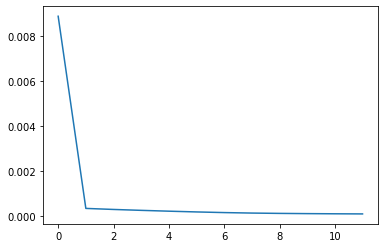

In [1185]:
# Plot the loss curve per epoch when executing the MLPClassifier FFNN with embedded Backpropagation algorithm.
plt.plot(mlp_sa.loss_curve_)
plt.show()

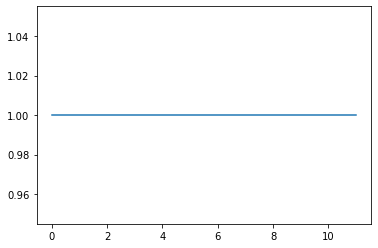

In [1186]:
# Plot the accuracy curve per epoch when executing the MLPClassifier FFNN with embedded Backpropagation algorithm.
plt.plot(mlp_sa.validation_scores_)
plt.show()

In [1187]:
# Create confusion matrix and subsequent classification report for training dataset with MLPClassifier.
cm_mlp_tr = confusion_matrix(y_train, train_pred)
cr_mlp_tr = classification_report(y_train, train_pred)

# Print the confusion matrix and classification report --> Training Dataset.
print(cm_mlp_tr)
print(cr_mlp_tr)

[[ 860    0    0]
 [   0 3604    0]
 [   0    0 3537]]
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       860
         0.0       1.00      1.00      1.00      3604
         1.0       1.00      1.00      1.00      3537

    accuracy                           1.00      8001
   macro avg       1.00      1.00      1.00      8001
weighted avg       1.00      1.00      1.00      8001



In [1188]:
# Create confusion matrix and subsequent classification report for testing dataset with MLPClassifier.
cm_mlp_ts = confusion_matrix(y_test, test_pred)
cr_mlp_ts = classification_report(y_test, test_pred)

# Print the confusion matrix and classification report --> Testing Dataset.
print(cm_mlp_ts)
print(cr_mlp_ts)

[[ 361    0    0]
 [   0 1543    0]
 [   0    0 1525]]
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       361
         0.0       1.00      1.00      1.00      1543
         1.0       1.00      1.00      1.00      1525

    accuracy                           1.00      3429
   macro avg       1.00      1.00      1.00      3429
weighted avg       1.00      1.00      1.00      3429



<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Train Dataset Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

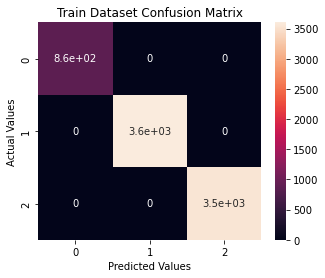

In [1189]:
# Train Dataset Confusion Matrix.
plt.figure(figsize=(5,4))
sns.heatmap(cm_mlp_tr, annot=True)
plt.title('Train Dataset Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Test Dataset Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

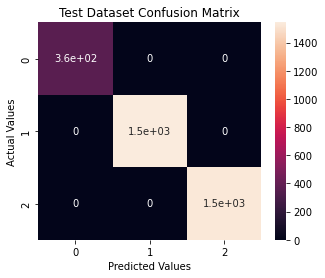

In [1190]:
# Test Dataset Confusion Matrix.
plt.figure(figsize=(5,4))
sns.heatmap(cm_mlp_ts, annot=True)
plt.title('Test Dataset Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [1191]:
# Print out all coefficients of the MLPClassifier Backpropagated FFNN.
print(mlp_sa.coefs_)

[array([[-3.02670143e-01,  6.93338773e-07, -4.02094943e-01,
         1.16709020e+00,  1.28338588e+00,  6.33149109e-01,
        -5.43432217e-01,  1.14937391e+00, -1.93079241e-01,
        -1.06710279e-01,  9.23998621e-07,  2.17604362e-02,
         3.30415861e-01, -3.68971099e-01,  4.60504975e-07,
        -7.26812294e-01, -1.00625599e+00, -2.25127494e-08,
        -1.65960814e-06, -9.85217295e-01,  1.08987187e+00,
         6.18875280e-01,  6.57421171e-01, -1.77818631e-01,
         3.55832257e-01, -7.10490760e-01,  1.19345516e+00,
         8.74266025e-07,  2.98160128e-01, -2.68805889e-01,
         1.26063947e+00,  3.77204278e-01,  5.19796014e-07,
         6.86175682e-01, -1.43332621e-02,  1.08089508e+00,
        -8.67407419e-01,  5.21388531e-07,  6.24503865e-07,
        -7.06751077e-01, -1.06364037e+00, -5.44587066e-01,
         6.17716423e-01, -1.08688615e+00, -1.18243169e-07,
        -3.50651662e-01, -6.95855237e-01, -1.21865121e-01,
         6.84374543e-07, -1.14808363e+00,  1.12831103e+

In [1192]:
# Print out all intercepts of the MLPClassifier Backpropagated FFNN.
print(mlp_sa.intercepts_)

[array([-0.39845572, -0.20788935, -0.64766589, -0.36860527, -0.28991592,
        1.12026705, -0.73697245, -0.11557289,  0.9851845 , -0.58908693,
       -0.17291793, -0.4925864 , -0.73850551, -0.17899504, -0.20234359,
        1.10433917, -0.24684248, -0.00966659, -0.1624052 ,  0.53338448,
        0.44240454,  0.59417312,  0.93610403,  1.2195886 , -0.72741539,
        0.71444428, -0.10520691, -0.10605698,  1.21291751, -0.20994426,
       -0.25601277, -0.76376069, -0.19261385, -0.43376143, -0.60039172,
       -0.22618215, -0.51982744, -0.15442661, -0.08646909, -0.47764758,
       -0.45004165,  0.11734743, -0.55007673, -0.33761346, -0.22842292,
        1.09551903,  0.11326077,  0.57436723, -0.235363  , -0.25343213,
       -0.22336563,  0.16252654, -0.83181923, -0.06583515,  1.02617961,
        0.21555657, -0.18300692, -0.48849585, -0.81543176, -0.2118542 ,
       -0.23480282,  1.32843829, -0.13739598, -0.28877798, -0.22164039,
        1.15760415, -0.62913251,  1.19790177,  0.12057973, -0.7

In [1193]:
# Print out the number of input features being computed through the MLPClassifier Backpropagated FFNN.
print(mlp_sa.n_features_in_)

2


Text(0.5, 1.0, 'Sequential vs. MLPClassifier Accuracy per Epoch')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

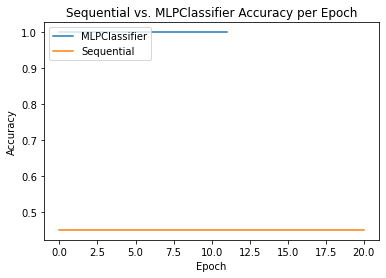

In [1194]:
# Plot accuracy score of Sequential model with accuracy score of MLPClassifier for comparison of models methods.
plt.plot(mlp_sa.validation_scores_)
plt.plot(sa_model_history.history['accuracy'])
plt.title('Sequential vs. MLPClassifier Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['MLPClassifier', 'Sequential'], loc='upper left')
plt.show()

# ****
# Beginning of Genetic Algorithm For Execution Upon Dataset.
# ****

In [1195]:
import pygad
import pygad.nn
import pygad.gann
import pygad.kerasga

In [1196]:
# Create a Keras Sequential FFNN neural network model with architecture of:
    # Input nodes: 2.
    # Hidden layer nodes: 10.
    # Output nodes: 1.
ga_model = Sequential()

ga_model.add(keras.Input(shape=(2,)))
ga_model.add(Dense(10, activation='sigmoid'))
ga_model.add(Dense(1))

In [1197]:
ga_model.compile(optimizer='adam', loss=tensorflow.keras.losses.CategoricalCrossentropy(), metrics=tensorflow.keras.metrics.Accuracy())

In [1198]:
print(ga_model.get_weights())

[array([[-0.6828165 ,  0.46479613, -0.29388323, -0.58567345,  0.5001679 ,
         0.6458054 ,  0.69671994,  0.17858124,  0.06472528,  0.48238546],
       [-0.44461402, -0.57483023,  0.6909507 ,  0.6142097 , -0.6431314 ,
         0.45575303,  0.07364535,  0.42343217, -0.44678962, -0.5755022 ]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[ 0.15622509],
       [-0.51129043],
       [ 0.63359016],
       [-0.44934505],
       [ 0.23572212],
       [-0.29659587],
       [ 0.12685835],
       [-0.5318924 ],
       [ 0.3024389 ],
       [-0.40330318]], dtype=float32), array([0.], dtype=float32)]


In [1199]:
gann_weights = np.concatenate([layer.flatten() for layer in ga_model.get_weights()])

masked_weights = np.zeros_like(gann_weights)
org_weights = int(0.1 * gann_weights.size)
org_indexes = np.random.choice(gann_weights.size, size=org_weights, replace=False)

masked_weights[org_indexes] = np.random.choice(gann_weights[org_indexes], size=org_weights)

print(masked_weights)

[0.         0.         0.         0.         0.         0.12685835
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.12685835
 0.         0.         0.         0.         0.         0.
 0.12685835 0.         0.         0.         0.        ]


In [1200]:
keras_ga = pygad.kerasga.KerasGA(model = ga_model,
                                 num_solutions = 20)

In [1201]:
def fitness_func(solution, sol_idx):
    global X_train, y_train, keras_ga, ga_model
    
    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=ga_model,
                                                                 weights_vector=solution)
    
    ga_model.set_weights(weights=model_weights_matrix)
    
    predictions = ga_model.predict(X_train)
    
    ba = tensorflow.keras.metrics.CategoricalAccuracy()
    ba.update_state(y_train, predictions)
    ret_acc = ba.result().numpy()
    
    return ret_acc

In [1202]:
print("X_train size: ", X_train.size)
print("y_train size: ", y_train.size)

X_train size:  16002
y_train size:  8001


In [1203]:
# Global array variables for storing train data and test data accuracy scores per GA epoch.
ga_arr_train_acc = []
ga_arr_test_acc = []

In [1204]:
def callback_generation(ga_instance):
    
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    
    ################ Storing values of the train dataset prediction accuracy. ################
    
    y_pred_tr_ga = pygad.kerasga.predict(model=ga_model,
                                      solution=solution,
                                      data=X_train)
    
    train_ba_ga = tensorflow.keras.metrics.BinaryAccuracy()
    train_ba_ga.update_state(y_train, y_pred_tr_ga)
    train_acc_ga = train_ba_ga.result().numpy()
    ga_arr_train_acc.append(train_acc_ga)
    print("Train Accuracy Score: {0:0.4f}".format(train_acc_ga))
    
    ################ Dividing line - Computing CA of Test Data Below. ################
    
    y_pred_ts_ga = pygad.kerasga.predict(model=ga_model,
                                         solution=solution,
                                         data=X_test)
    
    test_ba_ga = tensorflow.keras.metrics.BinaryAccuracy()
    test_ba_ga.update_state(y_test, y_pred_ts_ga)
    test_acc_ga = test_ba_ga.result().numpy()
    ga_arr_test_acc.append(test_acc_ga)
    print("Test Accuracy Score: {0:0.4f}".format(test_acc_ga))

In [1205]:
def mutation_exec(masked_weights, ga_model):
    
    global gann_weights
    
    non_masked_indexes = np.where(masked_weights == 1)[0]
    masked_indexes = np.where(masked_weights == 0)[0]
    
    if len(non_masked_indexes) > 0 and len(masked_weights) > 0:
        rand_nonmasked_index = np.random.choice(non_masked_indexes)
        rand_masked_index = np.where(masked_weights[rand_nonmasked_index] == 0)[0][0]
        
        p_val = ga_model[rand_nonmasked_index].copy()
        
        gann_weights[rand_nonmasked_index] = gann_weights[rand_masked_index]
        gann_weights[rand_masked_index] = p_val
        
        ga_model.set_weights(gann_weights)
        
        return ga_model

In [1206]:
initial_population = keras_ga.population_weights
num_generations = 10
num_parents_mating = 5
crossover_type = "two_points"
crossover_probability = 0.6
mutation_type = mutation_exec(masked_weights, ga_model)
parent_selection_type = "rws"
keep_elitism = 1

ga_fin = pygad.GA(num_generations=num_generations,
                  num_parents_mating=num_parents_mating,
                  initial_population=initial_population,
                  crossover_type=crossover_type,
                  crossover_probability=crossover_probability,
                  mutation_type=mutation_type,
                  parent_selection_type=parent_selection_type,
                  keep_elitism=keep_elitism,
                  fitness_func=fitness_func,
                  on_generation=callback_generation)

In [1207]:
ga_fin.run()

251/251 [==============================] - 0s 606us/step
Generation = 1
251/251 [==============================] - 0s 666us/step
Fitness = 1.0
251/251 [==============================] - 0s 656us/step
Train Accuracy Score: 0.4504
108/108 [==============================] - 0s 633us/step
Test Accuracy Score: 0.4500
251/251 [==============================] - 0s 644us/step
Generation = 2
251/251 [==============================] - 0s 599us/step
Fitness = 1.0
251/251 [==============================] - 0s 701us/step
Train Accuracy Score: 0.4504
108/108 [==============================] - 0s 680us/step
Test Accuracy Score: 0.4500
251/251 [==============================] - 0s 646us/step
Generation = 3
251/251 [==============================] - 0s 621us/step
Fitness = 1.0
251/251 [==============================] - 0s 644us/step
Train Accuracy Score: 0.4504
108/108 [==============================] - 0s 627us/step
Test Accuracy Score: 0.4500
251/251 [==============================] - 0s 628us/step
G

251/251 [==============================] - 0s 643us/step
Fitness = 1.0
251/251 [==============================] - 0s 656us/step
Train Accuracy Score: 0.4504
108/108 [==============================] - 0s 677us/step
Test Accuracy Score: 0.4500
251/251 [==============================] - 0s 600us/step
Generation = 6
251/251 [==============================] - 0s 628us/step
Fitness = 1.0
251/251 [==============================] - 0s 624us/step
Train Accuracy Score: 0.4504
108/108 [==============================] - 0s 639us/step
Test Accuracy Score: 0.4500
251/251 [==============================] - 0s 634us/step
Generation = 7
251/251 [==============================] - 0s 630us/step
Fitness = 1.0
251/251 [==============================] - 0s 626us/step
Train Accuracy Score: 0.4504
108/108 [==============================] - 0s 667us/step
Test Accuracy Score: 0.4500
251/251 [==============================] - 0s 689us/step
Generation = 8
251/251 [==============================] - 0s 600us/step
F

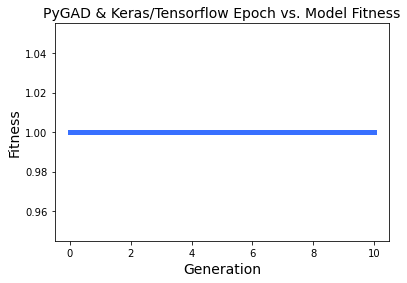

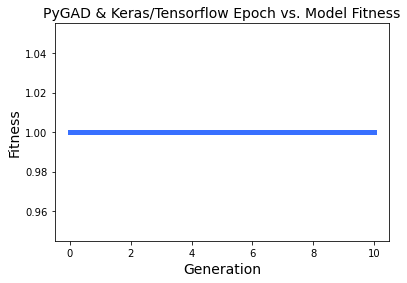

In [1208]:
ga_fin.plot_fitness(title = "PyGAD & Keras/Tensorflow Epoch vs. Model Fitness", linewidth=5)

In [1209]:
solution, solution_fitness, solution_idx = ga_fin.best_solution()

print("Fitness value of the best solution: {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution: {solution_idx}".format(solution_idx=solution_idx))

251/251 [==============================] - 0s 748us/step
Fitness value of the best solution: 1.0
Index of the best solution: 0


In [1210]:
predictions = pygad.kerasga.predict(model=ga_model,
                                    solution=solution,
                                    data=X_train)

print("Predictions: \n", predictions)

251/251 [==============================] - 0s 745us/step
Predictions: 
 [[1.1265559]
 [1.3794138]
 [1.1265559]
 ...
 [1.3794138]
 [1.6179724]
 [1.6179724]]


In [1211]:
bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Binary Crossentropy: ", bce(y_train, predictions).numpy())

Binary Crossentropy:  10.202978


In [1212]:
ba = tensorflow.keras.metrics.BinaryAccuracy() 
ba.update_state(y_train, predictions) 
ga_accuracy = ba.result().numpy() * 100
print("Genetic Algorithm Overall Accuracy: %", ga_accuracy)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=8001.0>

Genetic Algorithm Overall Accuracy: % 44.206973910331726


In [1213]:
y_pred_tr_ga = pygad.kerasga.predict(model=ga_model, 
                                     solution=solution, 
                                     data=X_train) 

train_ba_ga = tensorflow.keras.metrics.BinaryAccuracy() 
train_ba_ga.update_state(y_train, y_pred_tr_ga) 
train_acc_ga = train_ba_ga.result().numpy() 
print("Train Accuracy Score: {0:0.4f}".format(train_acc_ga)) 

y_pred_ts_ga = pygad.kerasga.predict(model=ga_model, 
                                     solution=solution, 
                                     data=X_test) 

test_ba_ga = tensorflow.keras.metrics.BinaryAccuracy() 
test_ba_ga.update_state(y_test, y_pred_ts_ga) 
test_acc_ga = test_ba_ga.result().numpy() 
print("Test Accuracy Score: {0:0.4f}".format(test_acc_ga))

251/251 [==============================] - 0s 997us/step


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=8001.0>

Train Accuracy Score: 0.4421
108/108 [==============================] - 0s 841us/step


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3429.0>

Test Accuracy Score: 0.4447


Text(0.5, 1.0, 'Genetic Algorithm Model - Accuracy vs. Log Weight Updates')

Text(0.5, 0, 'Log Weight Updates')

Text(0, 0.5, 'GA Accuracy')

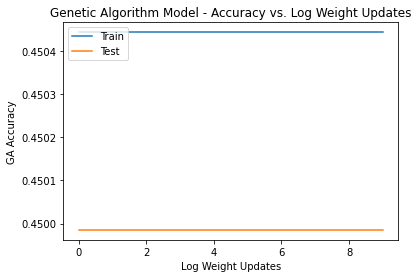

In [1214]:
plt.plot(ga_arr_train_acc) 
plt.plot(ga_arr_test_acc)
plt.title("Genetic Algorithm Model - Accuracy vs. Log Weight Updates")
plt.xlabel("Log Weight Updates") 
plt.ylabel("GA Accuracy") 
plt.legend(["Train", "Test"], loc = "upper left") 
plt.show()

# ****
# Beginning Of Differential Evolution For Execution Upon The Dataset.
# ****

In [ ]:
from scipy.optimize import differential_evolution

In [ ]:
# Variable to store DE train data and test data model.fit progress data.
history = None
train_acc_de = []
test_acc_de = []

In [ ]:
# Create a Keras Sequential FFNN neural network model with architecture of:
    # Input nodes: 2.
    # Hidden layer nodes: 10.
    # Output nodes: 1.
de_model = Sequential()

de_model.add(keras.Input(shape=(2,)))
de_model.add(Dense(10, activation='sigmoid'))
de_model.add(Dense(1))

In [ ]:
def fitness_func(params):
    global history, train_acc_de, test_acc_de
    
    loss = tensorflow.keras.losses.BinaryCrossentropy()
    de_model.compile(loss=loss, optimizer=Adam(), metrics=['accuracy'])
    history = de_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    
    accuracy = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy']
    train_acc_de.append(accuracy)
    test_acc_de.append(test_acc)
    
    return accuracy

In [ ]:
# Set bounds for the parameter search.

bounds = [(10, 100), (10, 100)]

In [ ]:
result = differential_evolution(fitness_func,
                                bounds,
                                tol=0.01,
                                maxiter=10,
                                mutation=(0.5, 1),
                                recombination=0.7)

In [1129]:
print('Optimal Accuracy: ', result.fun)
print('Optimal parameters for weight optimization: ', result.x)

Optimal Accuracy:  0.45044368505477905
Optimal parameters for weight optimization:  [81.46050087 80.88036173]


Text(0.5, 1.0, 'Model Accuracy vs. Log Weight Updates')

Text(0.5, 0, 'Log Weight Updates')

Text(0, 0.5, 'Model Accuracy')

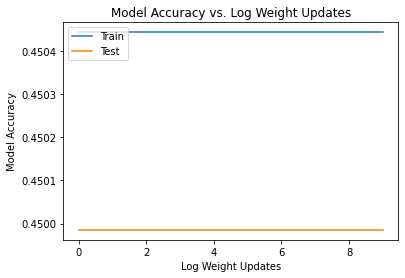

In [1130]:
# Plot train data and test data accuracy scores over DE algorithm execution.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy vs. Log Weight Updates")
plt.xlabel("Log Weight Updates")
plt.ylabel("Model Accuracy")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [1131]:
de_pred_y = de_model.predict(X_test).round()
de_pred_x = de_model.predict(X_train).round()

251/251 [==============================] - 0s 663us/step
